<font size="6" color="red"> ch1. NLTK 자연어 처리 패키지 </font>

# 1. NLTK 패키지

In [1]:
import nltk

In [2]:
# c:/nltk_data
# d:/nltk_data
# e:/nltk_data
# c:/Users/컴퓨터이름/nltk_data
# c:/Users/컴퓨터이름/anaconda3/nltk_data
# c:/Users/컴퓨터이름/anaconda3/share/nltk_data
# c:/Users/컴퓨터이름/anaconda3/lib/nltk_data
# c:/Users/컴퓨터이름/Appdata/Roaming/nltk_data 중 파일이 있어야 한다
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
emma=nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:50])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I





In [6]:
len(emma)

887071

In [7]:
# sent_tokenize() :문장단위로 나눠 list반환
from nltk. tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print('문장수 : ', len(sent_tokens))
print("%r" % sent_tokens[10])

문장수 :  7493
'It was on the wedding-day\nof this beloved friend that Emma first sat in mournful thought\nof any continuance.'


In [8]:
# word_tokenize() 단어 단위로 쪼갠 List 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[10]))

['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']


In [9]:
# regexpTokenizer클래스 : 토큰화시 정규표현식 이용
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('[\w]+')
print(ret.tokenize(sent_tokens[0]))

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미가 있는 가장 작은 말의 단위) 분석
cf. 자연어 처리의 기본은 형태소 분석과 품사태깅
    - 어간 추출(stemming)
    - 원형 복원(Lemmatizing)
    - 품사 태깅(Part of Speech Tagging)
    

In [10]:
words = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']
# 어간 추출(1) : PorterStemmer
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem(words[0]), pst.stem(words[1]), pst.stem(words[2])

('send', 'cook', 'file')

In [11]:
[pst.stem(w) for w in words]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [12]:
# 어간 추출(2) : LanscasterStemmer - 어간 추출하는 것 중 제일 많이 쓴다
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[lst.stem(w) for w in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [13]:
# 어간 추출(3) : RegexpStemmer
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(w) for w in words]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [14]:
# 어간 추출을 할 경우 의미가 달라질 수 있어 원형복원을 한다
word2 =['belives', 'cooking']
[lst.stem(w) for w in word2]

['bel', 'cook']

In [15]:
#원형복원
from nltk.stem.wordnet import WordNetLemmatizer
wl =WordNetLemmatizer()
[wl.lemmatize(w) for w in word2]

['belives', 'cooking']

In [16]:
# 품사 태깅
# https://dbrang.tistory.com/1139
from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[10]))
print(tagged_list)
print('\n품사태깅결과\n',tagged_list)


[('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]

품사태깅결과
 [('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]


## 퀴즈 : emma소설안에서 
<pre>
1. 특수문자 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅을 하시오
2. "Emma" 단어가 몇번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는지 모두 출력하시오
3. 내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오

In [4]:
#1.
import nltk
from nltk.tokenize import RegexpTokenizer #단어추출
from nltk.tag import pos_tag #품사태깅

emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
ret = RegexpTokenizer('[\w]{3,}')
emma_tags = pos_tag(ret.tokenize(emma))


In [8]:
print('emma의 글자수:',len(emma))
print('단어 출현수 : ', len(emma_tags))
print('단어 종류 수 :', len(set(emma_tags)))

emma의 글자수: 887071
단어 출현수 :  123877
단어 종류 수 : 11678


In [9]:
print(emma_tags)

[('Emma', 'NNP'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), ('VOLUME', 'NNP'), ('CHAPTER', 'NNP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), ('handsome', 'VBD'), ('clever', 'NN'), ('and', 'CC'), ('rich', 'JJ'), ('with', 'IN'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), ('seemed', 'VBD'), ('unite', 'JJ'), ('some', 'DT'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('existence', 'NN'), ('and', 'CC'), ('had', 'VBD'), ('lived', 'VBN'), ('nearly', 'RB'), ('twenty', 'JJ'), ('one', 'CD'), ('years', 'NNS'), ('the', 'DT'), ('world', 'NN'), ('with', 'IN'), ('very', 'RB'), ('little', 'JJ'), ('distress', 'NN'), ('vex', 'IN'), ('her', 'PRP$'), ('She', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('youngest', 'JJS'), ('the', 'DT'), ('two', 'CD'), ('daughters', 'NNS'), ('most', 'RBS'), ('affectionate', 'JJ'), ('indulgent', 'NN'), ('father', 'NN'), ('and', 'CC'), ('had', 'VBD'), ('consequence', 'NN'), ('her', 'PRP$'), ('sister', 'JJ'), ('ma

In [10]:
#2. emma 출현횟수, emma품사?
# pos = set() # 품사들
# cnt = 0
# for emma_t in emma_tags:
#     if emma_t[0] == 'Emma':
#         cnt+=1
#         pos.add(emma_t[1])

cnt = len([emma_t[1] for emma_t in emma_tags if emma_t[0] == 'Emma'])
pos = set([emma_t[1] for emma_t in emma_tags if emma_t[0] == 'Emma'])
print('출현 횟수 : ', cnt)
print('분류된 품사들 : ', pos)
    


출현 횟수 :  865
분류된 품사들 :  {'NNPS', 'NN', 'NNP', 'VBN', 'VBP', 'VBD', 'RB', 'NNS', 'JJ', 'VB'}


In [12]:
import pandas as pd
pos_cnt = pd.Series([0]*len(pos), index=list(pos))
for emma_t in emma_tags:
    if emma_t[0] == 'Emma':
        pos_cnt[emma_t[1]] +=
pos_cnt

NNPS      2
NN        7
NNP     838
VBN       1
VBP       4
VBD       1
RB        1
NNS       2
JJ        4
VB        5
dtype: int64

In [17]:
#3. 명사들만 추출해서 갯수
nouns_list = [ emma_t[0] for emma_t in emma_tags if (emma_t[1]=='NN') | (emma_t[1]=='NNS') | (emma_t[1]=='NNP') | (emma_t[1]=='NNPS')]
print('명사가 나온 횟수 :', len(nouns_list))
print('출현한 명사 수(반복제거) : ', len(set(nouns_list)))
print('한단어가 나오는 평균빈도수 :', len(nouns_list)/len(set(nouns_list)))

명사가 나온 횟수 : 30781
출현한 명사 수(반복제거) :  4165
한단어가 나오는 평균빈도수 : 7.3903961584633855


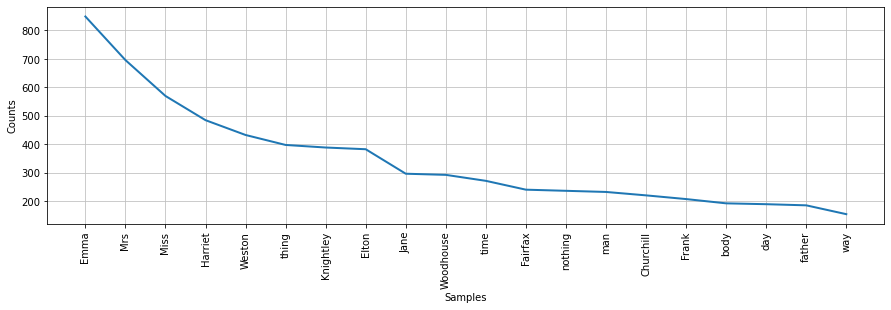

In [19]:
# 최빈 단어 시각화
words = ret.tokenize(emma)
import matplotlib.pyplot as plt
from nltk import Text
emma_text = Text(nouns_list)
plt.figure(figsize=(15,4))
emma_text.plot(20)


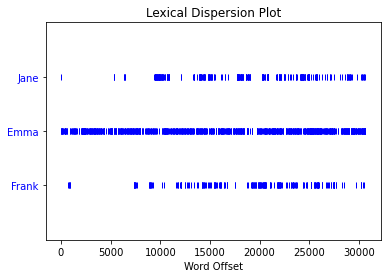

In [21]:
emma_text.dispersion_plot(['Jane','Emma','Frank'])

In [23]:
# 단어 출현 빈도
name_list=[t[0] for t in emma_tags if (t[1]=='NNP') | (t[1]=='NNPS')]
from nltk import FreqDist
FreqDist(name_list)

FreqDist({'Emma': 840, 'Mrs': 696, 'Miss': 569, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})

In [25]:
#100번 이상 반복되는 이름들 출력
for name,freq in FreqDist(name_list).items():
    if freq>150:
        print(name, ':', freq)

Emma : 840
Jane : 295
Woodhouse : 293
Miss : 569
Weston : 433
Mrs : 696
Hartfield : 155
Knightley : 389
Elton : 382
Churchill : 221
Frank : 208
Harriet : 484
Fairfax : 241


In [27]:
# 정렬된 wordcount
dic = dict(FreqDist(name_list))
wordcnt = pd.Series(dic)
wordcnt.sort_values(ascending =False, inplace=True)
wordcnt.head()

Emma       840
Mrs        696
Miss       569
Harriet    484
Weston     433
dtype: int64

In [28]:
#150번 이상 출현한 이름들을 sort해서 출력
wordcnt[wordcnt>150]

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64